Exercise Sheet 8 **Statistical learning theory**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import factorial as fct
sqrt = math.sqrt
pi = math.pi
exp = np.exp
mm = np.matmul
inv = np.linalg.inv
sgn = np.sign


**8.2: Variability of classification**

In [2]:
def _sample_(N):
    # sample generation
    miu1 = np.array([0,1]).T
    miu2 = np.array([1,0]).T
    I = np.identity(2)
    bias = np.ones((N,1))
    X = np.zeros((N,2))
    Y = np.zeros((N,1))
    if N%2 == 1:
        N1 = int(np.round((N-1)/2))
        N2 = int(np.round((N+1)/2))
    else:
        N1 = int(np.round(N/2))
        N2 = int(np.round(N/2))
    iN = 0
    for n in range(N1):
        X[iN,:] = np.random.multivariate_normal(miu1, 2*I)
        Y[iN,:] = 1
        iN += 1
    for n in range(N2):
        X[iN,:] = np.random.multivariate_normal(miu2, 2*I)
        Y[iN,:] = -1
        iN += 1
    XY = np.concatenate((bias,X,Y),axis=1)
    np.random.shuffle(XY)
    return XY[:,0:3], XY[:,3].reshape((N,1))

def _weight_(X, Y):
    return mm(mm(Y.T,X),inv(mm(X.T,X)))

def _predict_(X,W):
    return sgn(mm(X,W.T))

def _acc(Y, P):
    assert np.shape(Y) == np.shape(P)
    return np.sum([Y == P])/np.sum([Y == Y])


In [3]:
N_v = 1000 # validation set
N_set = [3, 4, 6, 8, 10, 20, 40, 100, 1000]
iN = len(N_set)
_accuracies_ = np.zeros((50,iN,2))
_weights_ = np.zeros((50,iN,3))
N_arange = np.arange(iN)

for j in range(50):
    for i in range(iN):
        N_t = N_set[i]
        X_t, Y_t = _sample_(N_t)
        W = _weight_(X_t, Y_t)
        _weights_[j,i,:] = W
        Y_t_p = _predict_(X_t,W)
        _accuracies_[j,i,0] = _acc(Y_t, Y_t_p)
        X_v, Y_v = _sample_(N_v)
        Y_v_p = _predict_(X_v,W)
        _accuracies_[j,i,1] = _acc(Y_v, Y_v_p)


**(a)**

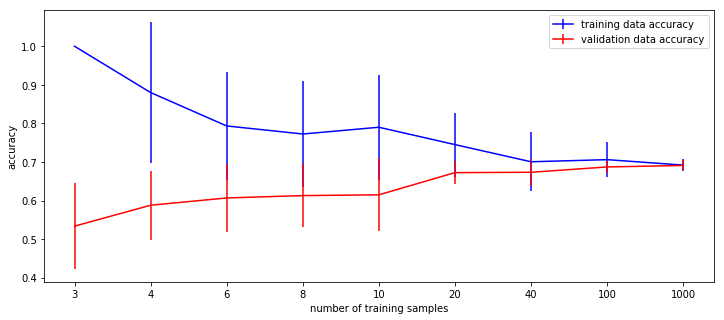

In [4]:
_mean_acc_ = np.mean(_accuracies_,axis=0)
_std_acc_ = np.std(_accuracies_,axis=0)

# plotting
plt.figure(figsize=(12,5))
plt.errorbar(N_arange,_mean_acc_[:,0],yerr=_std_acc_[:,0],color='b',
            label='training data accuracy')
plt.errorbar(N_arange,_mean_acc_[:,1],yerr=_std_acc_[:,1],color='r',
            label='validation data accuracy')
plt.xticks(N_arange, np.array(N_set))
plt.xlabel('number of training samples')
plt.ylabel('accuracy')
plt.legend()
plt.show()


**(b)**

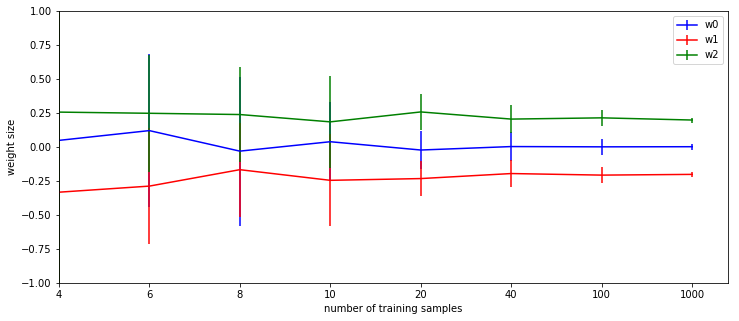

In [5]:
_mean_W_ = np.mean(_weights_,axis=0)
_std_W_ = np.std(_weights_,axis=0)

# plotting
plt.figure(figsize=(12,5))
plt.errorbar(N_arange,_mean_W_[:,0],yerr=_std_W_[:,0],color='b',
            label='w0')
plt.errorbar(N_arange,_mean_W_[:,1],yerr=_std_W_[:,1],color='r',
            label='w1')
plt.errorbar(N_arange,_mean_W_[:,2],yerr=_std_W_[:,1],color='g',
            label='w2')
plt.xticks(N_arange, np.array(N_set))
plt.xlabel('number of training samples')
plt.ylabel('weight size')
plt.legend()
plt.xlim(1,)
plt.ylim(-1,1)
plt.show()


**(c)**

since Vapnik-Chervonenkis dimension of this linear connectionist neuron network is 3, the accuracy over training data is 100% if the number of samples is 3. by increasing the training samples, the accuracy of prediction over the training data decreases but the accuracy of prediction over the test (validation) samples increases. In a sense, by increasing the number of training samples, the training error increases but the network is performs better generally (generalization).  
We can also see that by increasing the number of training samples, the variance of weights decreases. In another word, with more training data, the weights will converge to a more general solution.

**8.3: The Binomial distribution**

In [6]:
def binom_dist(n,p):
    k = np.arange(n+1)
    return k, (fct(n)/(fct(k)*fct(n-k)))*(p**k)*((1-p)**(n-k))

def norm_dist(x_range,miu,sigma):
    # please note that the x_range should be a tuple
    x = np.linspace(x_range[0],x_range[1],201,endpoint=True)
    return x, (1/(sigma*sqrt(2*pi)))*exp(-((x-miu)**2)/(2*sigma*sigma))

def pois_dist(k_range,lmbd):
    # please note that the k_range should be a tuple
    k = np.arange(k_range[0],k_range[1]+1)
    return k, np.abs(((lmbd**k)/fct(k))*exp(-lmbd))


**(a)**

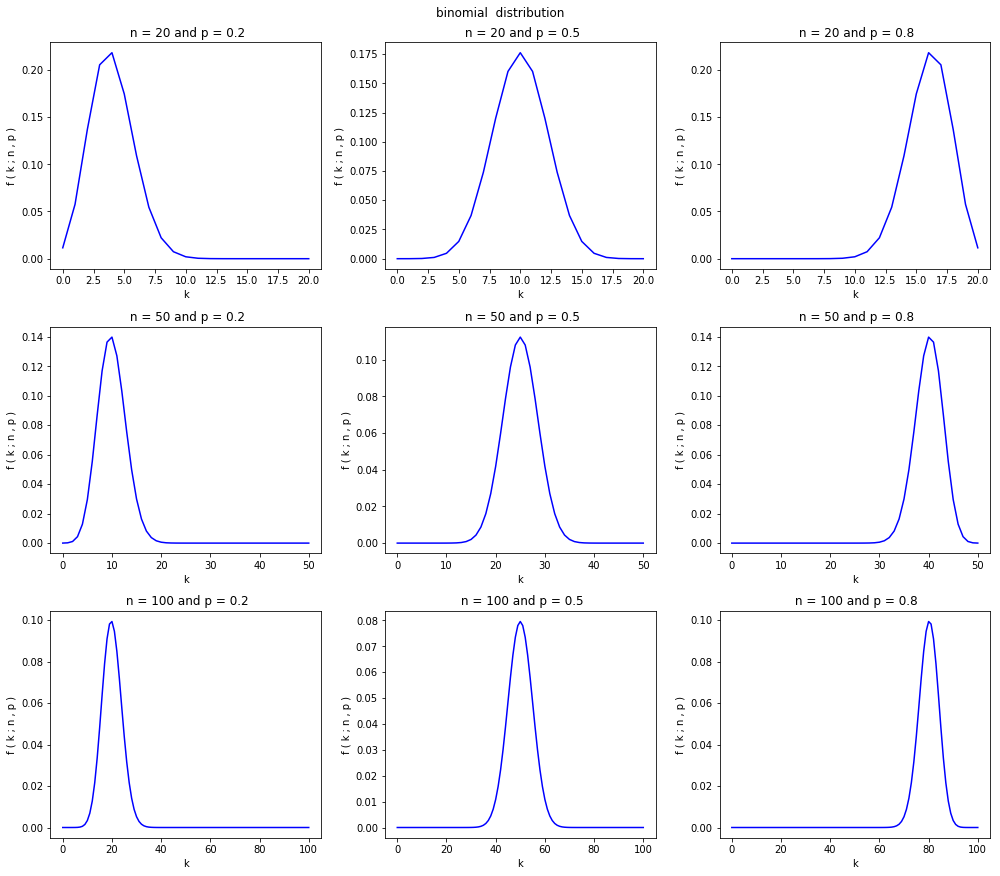

In [7]:
i = 1
n_set = [20,50,100]
p_set = [0.2, 0.5, 0.8]
plt.figure(figsize=(14,12))
for n in n_set:
    for p in p_set:
        plt.subplot(len(n_set),len(p_set),i)
        k,f_bin_k = binom_dist(n,p)
        plt.plot(k,f_bin_k,color='b')
        plt.title(' n = %d and p = %.1f' % (n,p))
        plt.xlabel('k')
        plt.ylabel('f ( k ; n , p )')
        i += 1

plt.suptitle('binomial  distribution', y=1.01,)
plt.tight_layout()
plt.show()


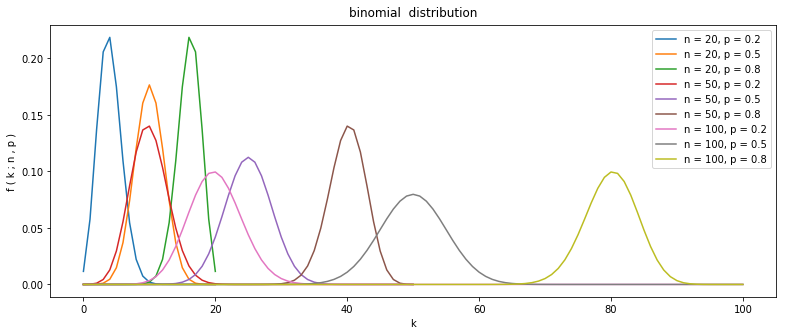

In [8]:
i = 1
n_set = [20,50,100]
p_set = [0.2, 0.5, 0.8]
plt.figure(figsize=(13,5))
for n in n_set:
    for p in p_set:
        k,f_bin_k = binom_dist(n,p)
        plt.plot(k,f_bin_k,label=('n = %d, p = %.1f' % (n,p)))
plt.xlabel('k')
plt.ylabel('f ( k ; n , p )')
plt.title('binomial  distribution', y=1.01,)
plt.legend()
plt.show()


**(b)**

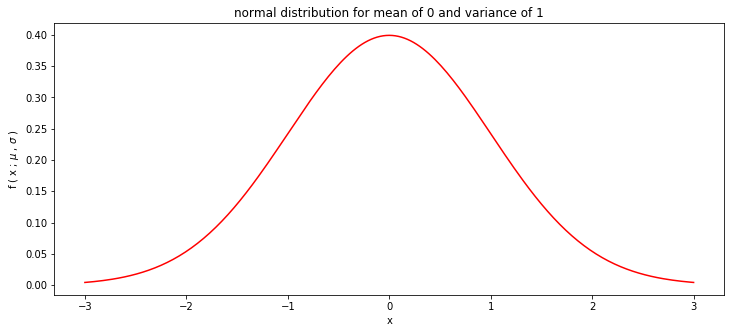

In [9]:
x, f_norm_x = norm_dist((-3,3),0,1)
plt.figure(figsize=(12,5))
plt.plot(x,f_norm_x,color='r')
plt.title('normal distribution for mean of 0 and variance of 1')
plt.xlabel('x')
plt.ylabel(r'f ( x ; $\mu$ , $\sigma$ )')
plt.show()

If n is large and/or if k is close to .5, then a normal distribution with a mean of np and a variance of np(1-p) is a reasonable approximation.  
Unlike the binomial distribution, for which the largest value is n, the normal distribution pmf can take on values larger than n. Albeit, the parameters can be set so that the probability of choosing a value larger than n is small, but ultimately there will always be some chance that a random sampling returns value larger than n.  
One reason the normal distribution is so widely used because it is characterized by only two parameters which makes modeling with it easy.

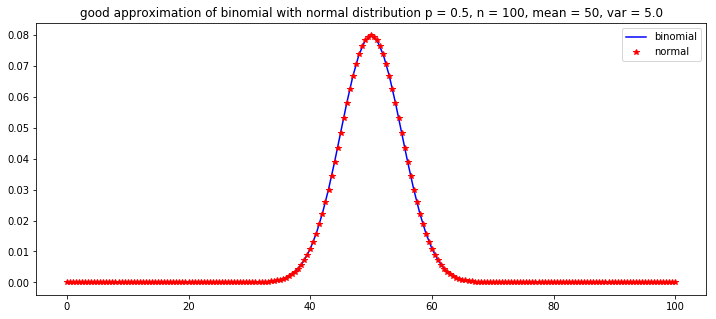

In [10]:
# good approximation
p = 0.5
q = 1-p
n = 100
mu = n*p
sigma = np.sqrt(n*p*q)
k,f_bin_k = binom_dist(n,p)
x, f_norm_x = norm_dist((0,100),mu,sigma)
plt.figure(figsize=(12,5))
plt.plot(k,f_bin_k,color='b',label='binomial')
plt.plot(x,f_norm_x,'*',color='r',label='normal')
plt.title('good approximation of binomial with normal distribution'
          ' p = %.1f, n = %d, mean = %d, var = %.1f' %(p,n,mu,sigma))
plt.legend()
plt.show()


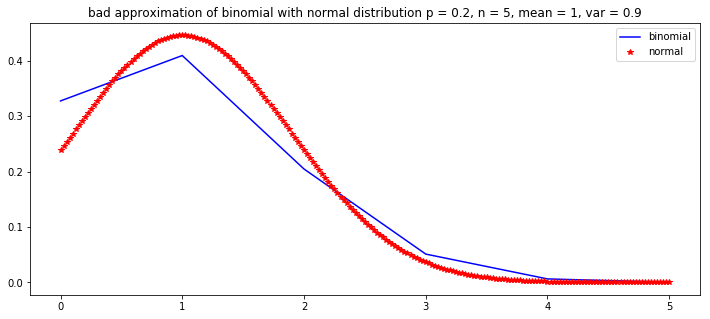

In [11]:
# bad approximation
p = 0.2
q = 1-p
n = 5
mu = n*p
sigma = np.sqrt(n*p*q)
k,f_bin_k = binom_dist(n,p)
x, f_norm_x = norm_dist((0,5),mu,sigma)
plt.figure(figsize=(12,5))
plt.plot(k,f_bin_k,color='b',label='binomial')
plt.plot(x,f_norm_x,'*',color='r',label='normal')
plt.title('bad approximation of binomial with normal distribution'
          ' p = %.1f, n = %d, mean = %d, var = %.1f' %(p,n,mu,sigma))
plt.legend()
plt.show()

**(c)**

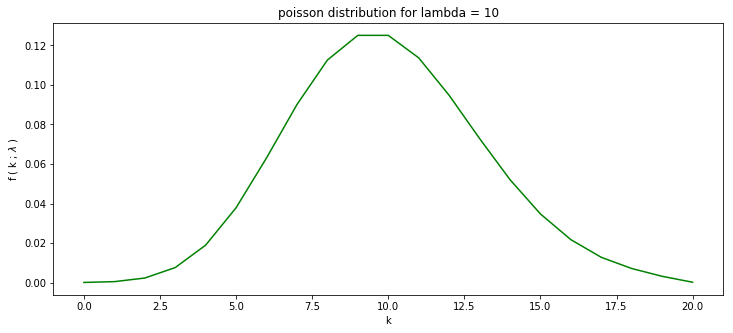

In [12]:
k, f_pois_k = pois_dist((0,20),10)
plt.figure(figsize=(12,5))
plt.plot(k, f_pois_k,color='g')
plt.title('poisson distribution for lambda = 10')
plt.xlabel('k')
plt.ylabel(r'f ( k ; $\lambda$ )')
plt.show()


Keeping in mind that the conditions of Poisson approximation to Binomial are complementary to the conditions for Normal Approximation of Binomial Distribution, The poisson distribution is a reasonable approximation when n is large and p is small, such that (lambda = n * p) < 10 ! The larger the n and the smaller the p would lead to a better approximation.

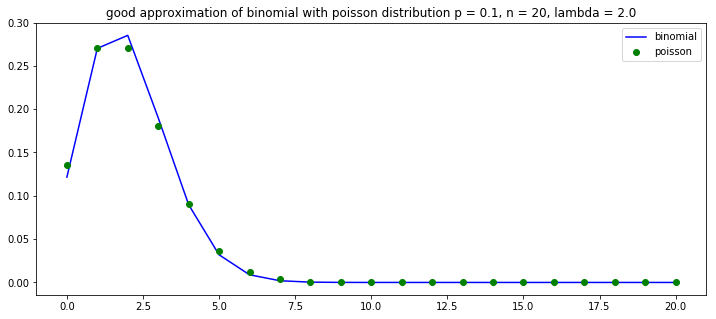

In [13]:
# good approximation
p = 0.1
q = 1-p
n = 20
lmbd = n*p
kb,f_bin_k = binom_dist(n,p)
kp,f_pois_k = pois_dist((0,20),lmbd)
plt.figure(figsize=(12,5))
plt.plot(kb,f_bin_k,color='b',label='binomial')
plt.plot(kp,f_pois_k,'o',color='g',label='poisson')
plt.title('good approximation of binomial with poisson distribution'
          ' p = %.1f, n = %d, lambda = %.1f' %(p,n,lmbd))
plt.legend()
plt.show()


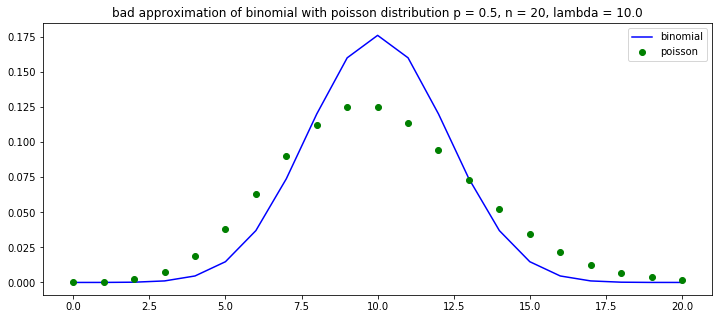

In [14]:
# bad approximation
p = 0.5
q = 1-p
n = 20
lmbd = n*p
kb,f_bin_k = binom_dist(n,p)
kp,f_pois_k = pois_dist((0,20),lmbd)
plt.figure(figsize=(12,5))
plt.plot(kb,f_bin_k,color='b',label='binomial')
plt.plot(kp,f_pois_k,'o',color='g',label='poisson')
plt.title('bad approximation of binomial with poisson distribution'
          ' p = %.1f, n = %d, lambda = %.1f' %(p,n,lmbd))
plt.legend()
plt.show()
